# Project: We Rate Dogs Analysis

### Introduction
- Will be accessing three datasets from @dog_rates also known as WeRateDogs on twitter. These datasets will be downloaded manually and programatically using the request library and Twitter API

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
import re
from timeit import default_timer as timer

In [2]:
df_1= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

In [4]:
image_pred= pd.read_csv('image-predictions.tsv', sep= '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = 'XOXO'
consumer_secret = 'XOXO'
access_token = 'XOXO'
access_secret = 'XOXO'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list= []
with open('tweet_json.txt', 'r') as tweet_data:
    for line in tweet_data:
        data= json.loads(line)
        tweet_id = data['id']
        created_at= data['created_at']
        favorite_count= data['favorite_count']
        retweet_count= data['retweet_count']

        df_list.append({'tweet_id': tweet_id,
                        'date_created': created_at,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count,
                        })

In [6]:
tweet_df=pd.DataFrame(df_list)
tweet_df.head()

,date_created,favorite_count,retweet_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,33681,6966,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,29215,5271,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,21966,3464,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,36773,7190,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,35170,7710,891327558926688256


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
date_created      2327 non-null object
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


## Assessing Data


### Visual Assessment

In [8]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
tweet_df

,date_created,favorite_count,retweet_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,33681,6966,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,29215,5271,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,21966,3464,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,36773,7190,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,35170,7710,891327558926688256
5,Sat Jul 29 00:08:17 +0000 2017,17739,2584,891087950875897856
6,Fri Jul 28 16:27:12 +0000 2017,10327,1646,890971913173991426
7,Fri Jul 28 00:22:40 +0000 2017,56631,15673,890729181411237888
8,Thu Jul 27 16:25:51 +0000 2017,24408,3603,890609185150312448
9,Wed Jul 26 15:59:51 +0000 2017,27837,6065,890240255349198849


### Programmatic Assessment

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_1.name.duplicated().sum()

1399

In [13]:
list(df_1.name.unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
date_created      2327 non-null object
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [16]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
tweet_df.describe()

,favorite_count,retweet_count,tweet_id
count,2327.000000,2327.000000,2.327000e+03
mean,7023.077353,2457.584873,7.417930e+17
std,10913.803081,4161.481548,6.820795e+16
min,0.000000,1.000000,6.660209e+17
25%,1219.000000,492.500000,6.781394e+17
50%,3034.000000,1143.000000,7.178418e+17
75%,8560.500000,2845.000000,7.986547e+17
max,144160.000000,70283.000000,8.924206e+17


In [19]:
df_1.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [20]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
df_1.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [22]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
df_1.loc[df_1.tweet_id == 666407126856765440, 'text'].values[0]

'This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h'

In [24]:
sum(image_pred.tweet_id.duplicated())

0

In [25]:
image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
image_pred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
image_pred.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [28]:
sum(tweet_df.tweet_id.duplicated())

0

### Quality issues
1.Change rating denominator

2.Drop duplicated URL's

3. - Change Timestamp from object to datetime format.
  - Change Tweet_id from int to String in all three datasets

4.Remove incorrect names in df_1

5.Drop all columns with retweeted in df_1 and image_tweet_df

6.Inconsistent data format

7.Drop predictions that are not for dogs

8.Make image prediction column names more descriptive

### Tidiness issues
1.Melt Puppo, doggo, floofer, pupper into a column

2.Joint all tables into a data Frame

## Cleaning Data

**Note:** Create a Duplicate copy

In [29]:
# Make copies of original pieces of data
twitter_archive_clean= df_1.copy()
image_prediction_clean= image_pred.copy()
tweet_json_clean= tweet_df.copy()

### Correct denominators

#### Replace denominators which value is not 10

#### Code

In [30]:
twitter_archive_clean.rating_denominator= twitter_archive_clean.rating_denominator.replace([0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2],10)

#### Test

In [31]:
twitter_archive_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Drop Duplicate URL's

#### Code

In [32]:
sum(image_prediction_clean['jpg_url'].duplicated())

66

In [33]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset = ['jpg_url'], keep = 'last')

#### Test

In [34]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

### Change Datatypes

### Define

####  Change Timestamp to datetime format

#### Code

In [35]:
# Change type from Object to Datetime
twitter_archive_clean.timestamp= pd.to_datetime(twitter_archive_clean.timestamp, format='%Y-%m-%d %H:%M:%S')

#### Test

In [36]:
type(twitter_archive_clean['timestamp'])

pandas.core.series.Series

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Clean incorrect names

#### Define

- Clean names like a, such, from, then e.t.c.

#### Code

In [38]:
# use regrex function to remove all names with small characters
twitter_archive_clean.name = [None if x == 'None' or re.search("^[a-z]", x)\
            else x for x in twitter_archive_clean.name]

In [39]:
# locate names with 'O'
twitter_archive_clean.loc[twitter_archive_clean.name == 'O', 'text'].values

array([ "This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"], dtype=object)

In [40]:
# Replace the names with 'O' to 'O'Malley'
twitter_archive_clean.replace('O', 'O\'Malley', inplace = True)

#### Test

In [41]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', None, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooey'

###  Drop NaN in retweet_status

#### Define

#### Delete retweets by filtering the NaN of retweeted_status_user_id

In [42]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test

In [43]:
#re-confirm for unique numbers
twitter_archive_clean.retweeted_status_user_id.unique()

array([ nan])

In [44]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


### Drop Columns with Retweets

#### Define

- Drop columns with retweet_status_id , retweeted_status_user_id , retweeted_status_timestamp

#### Code

In [45]:
twitter_archive_clean= twitter_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [46]:
tweet_json_clean= tweet_json_clean.drop(columns= ['retweet_count'])

#### Test

In [47]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Change all three tweet_id datatypes from int to string

#### Define

- Change tweet_id for twitter_archive_clean from int to string
- Change tweet_id for image_prediction_clean from int to string
- Change tweet_id for tweet_json_clean from int to string
- Change in_reply_to_status_id from int to string
- Change in_reply_to_user_id from int to sting

#### Code

In [48]:
# Change tweet_id for twitter_archive_clean from int to string
twitter_archive_clean.tweet_id= twitter_archive_clean.tweet_id.astype(str)

In [49]:
# Change in_reply_to_status_id from int to string
twitter_archive_clean.in_reply_to_status_id= twitter_archive_clean.in_reply_to_status_id.astype(str)

In [50]:
# Change in_reply_to_user_id from int to sting
twitter_archive_clean.in_reply_to_user_id= twitter_archive_clean.in_reply_to_user_id.astype(str)

#### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 254.9+ KB


#### Code

In [52]:
# Change tweet_id for image_prediction_clean from int to string
image_prediction_clean.tweet_id= image_prediction_clean.tweet_id.astype(str)

#### Test

In [53]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


#### Code

In [54]:
# Change tweet_id for tweet_json_clean from int to string
tweet_json_clean.tweet_id= tweet_json_clean.tweet_id.astype(str)

#### Test

In [55]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
date_created      2327 non-null object
favorite_count    2327 non-null int64
tweet_id          2327 non-null object
dtypes: int64(1), object(2)
memory usage: 54.6+ KB


### Use regex to extract the source (Twitter for iPhone, Twitter Web Client, or TweetDeck) from source column in twitter archive

In [56]:
#Use regex to extract the source 
twitter_archive_clean.source.str.extract(r"(?<=>)(.*)(?=<)")

,0
0,Twitter for iPhone
1,Twitter for iPhone
2,Twitter for iPhone
3,Twitter for iPhone
4,Twitter for iPhone
5,Twitter for iPhone
6,Twitter for iPhone
7,Twitter for iPhone
8,Twitter for iPhone
9,Twitter for iPhone


In [57]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
twitter_archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace=True)
twitter_archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', inplace=True)
twitter_archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
twitter_archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)

In [59]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
Tweetdeck               11
Name: source, dtype: int64

### Drop Pridictions that are not for dogs

#### Define

- Drop predictions that are not for dogs.

#### Code

In [60]:
image_prediction_clean.p1_dog.value_counts()

True     1480
False     529
Name: p1_dog, dtype: int64

In [61]:
image_prediction_clean["p1_dog"].replace(False, np.nan, inplace = True)
image_prediction_clean["p2_dog"].replace(False, np.nan, inplace = True)
image_prediction_clean["p3_dog"].replace(False, np.nan, inplace = True)

In [62]:
#drop the nan values
image_prediction_clean.p1_dog.dropna()
image_prediction_clean.p2_dog.dropna()
image_prediction_clean.p3_dog.dropna()

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
19      1.0
20      1.0
22      1.0
23      1.0
24      1.0
26      1.0
27      1.0
28      1.0
30      1.0
31      1.0
32      1.0
35      1.0
36      1.0
37      1.0
38      1.0
       ... 
2035    1.0
2036    1.0
2037    1.0
2038    1.0
2039    1.0
2040    1.0
2041    1.0
2042    1.0
2043    1.0
2045    1.0
2047    1.0
2049    1.0
2050    1.0
2053    1.0
2054    1.0
2055    1.0
2056    1.0
2057    1.0
2058    1.0
2059    1.0
2060    1.0
2061    1.0
2062    1.0
2064    1.0
2065    1.0
2066    1.0
2067    1.0
2070    1.0
2072    1.0
2073    1.0
Name: p3_dog, Length: 1450, dtype: float64

#### Test

In [63]:
image_prediction_clean.p1_dog.value_counts()

1.0    1480
Name: p1_dog, dtype: int64

### Make image prediction column names more descriptive

#### Define

- Rename column with p to prediction

#### Code

In [64]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [65]:
image_prediction_clean.columns = ('tweet_id','jpg_url','img_num','prediction_1',
'prediction_1_conf',
'prediction_1_breed',
'prediction_2',
'prediction_2_conf',
'prediction_2_breed',
'prediction_3',
'prediction_3_conf',
'prediction_3_breed')

### Test

In [66]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2009 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
prediction_1          2009 non-null object
prediction_1_conf     2009 non-null float64
prediction_1_breed    1480 non-null float64
prediction_2          2009 non-null object
prediction_2_conf     2009 non-null float64
prediction_2_breed    1500 non-null float64
prediction_3          2009 non-null object
prediction_3_conf     2009 non-null float64
prediction_3_breed    1450 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 204.0+ KB


# Tidiness Issue

### Dog stages in one column doggo, floofer, pupper, and puppo

#### Define

- Melt Dog stages like doggo, floofer, pupper, puppo into one column

#### Code

twitter_archive_clean['Dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [67]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [68]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [69]:
twitter_archive_clean['dog_stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [70]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,nan,nan,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,nan,nan,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,nan,nan,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,nan,nan,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Inconsistent data format

#### Define
- Make all data in prediction_1, prediction_2, prediction_3, consistent in proper case

#### Code

In [71]:
image_prediction_clean["prediction_1"].value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           55
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
web_site                      19
Staffordshire_bullterrier     19
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Cardigan                      17
beagle                        17
Lakeland_terrier              16
kuvasz                        16
Italian_greyhound             16
          

In [72]:
image_prediction_clean["prediction_2"].value_counts()

Labrador_retriever                96
golden_retriever                  83
Cardigan                          72
Chihuahua                         43
French_bulldog                    40
Chesapeake_Bay_retriever          40
Pomeranian                        39
toy_poodle                        36
Siberian_husky                    33
cocker_spaniel                    32
miniature_poodle                  32
beagle                            28
Eskimo_dog                        27
collie                            26
Pembroke                          25
kuvasz                            25
Italian_greyhound                 22
Pekinese                          21
American_Staffordshire_terrier    20
miniature_pinscher                20
malinois                          20
chow                              20
Samoyed                           19
toy_terrier                       19
Boston_bull                       19
Norwegian_elkhound                19
Staffordshire_bullterrier         18
p

In [73]:
image_prediction_clean["prediction_3"].value_counts()

Labrador_retriever                76
Chihuahua                         57
golden_retriever                  46
Eskimo_dog                        36
kelpie                            33
chow                              31
kuvasz                            31
beagle                            30
Staffordshire_bullterrier         30
cocker_spaniel                    29
Pekinese                          29
toy_poodle                        29
Pomeranian                        27
Pembroke                          26
Great_Pyrenees                    26
French_bulldog                    25
malamute                          25
Chesapeake_Bay_retriever          24
American_Staffordshire_terrier    23
Cardigan                          23
pug                               21
basenji                           20
bull_mastiff                      20
Siberian_husky                    19
toy_terrier                       18
Shetland_sheepdog                 17
Boston_bull                       17
L

In [74]:
for i in ["prediction_1", "prediction_2", "prediction_3"]:
    image_prediction_clean[f"{i}"] = image_prediction_clean[f"{i}"].apply(lambda x: x.title())

#### Test

In [75]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_conf,prediction_1_breed,prediction_2,prediction_2_conf,prediction_2_breed,prediction_3,prediction_3_conf,prediction_3_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,1.0,Collie,0.156665,1.0,Shetland_Sheepdog,0.061428,1.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,1.0,Miniature_Pinscher,0.074192,1.0,Rhodesian_Ridgeback,0.072010,1.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,1.0,Malinois,0.138584,1.0,Bloodhound,0.116197,1.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,1.0,Redbone,0.360687,1.0,Miniature_Pinscher,0.222752,1.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,1.0,Rottweiler,0.243682,1.0,Doberman,0.154629,1.0


## Merge all data together

#### Define

- Merge twitter_archieve_clean, Image_prediction_clean, and tweet_json_clean together toform a dataset

#### Code

In [76]:
all_data_clean= twitter_archive_clean.merge(image_prediction_clean, on= 'tweet_id', how = 'inner').merge(tweet_json_clean, on= 'tweet_id', how= 'inner')

#### Test

In [77]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 1920
Data columns (total 24 columns):
tweet_id                 1921 non-null object
in_reply_to_status_id    1921 non-null object
in_reply_to_user_id      1921 non-null object
timestamp                1921 non-null datetime64[ns]
source                   1921 non-null object
text                     1921 non-null object
expanded_urls            1921 non-null object
rating_numerator         1921 non-null int64
rating_denominator       1921 non-null int64
name                     1297 non-null object
dog_stage                295 non-null object
jpg_url                  1921 non-null object
img_num                  1921 non-null int64
prediction_1             1921 non-null object
prediction_1_conf        1921 non-null float64
prediction_1_breed       1418 non-null float64
prediction_2             1921 non-null object
prediction_2_conf        1921 non-null float64
prediction_2_breed       1436 non-null float64
prediction_

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
all_data_clean.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data


### Analysis so far from the datasets

- All Three datasets has been gathered from manual downloading, programmatic dowmloading from udacity site using request url and scrapped from twitter using the twitter API and read into a json file. 
- All these datasets gathered has been cleaned and joined together to form a dataset. and the insight gathered from this dataset is

### Insights:
1.The top most common dog names are; Charlie, Oliver, Cooper, Lucy.

2.The highest mode of tweeting was with iphone.

3.Golden_Retriever and Labrador_Retriever are the top two highly rated breeds.

### Visualization

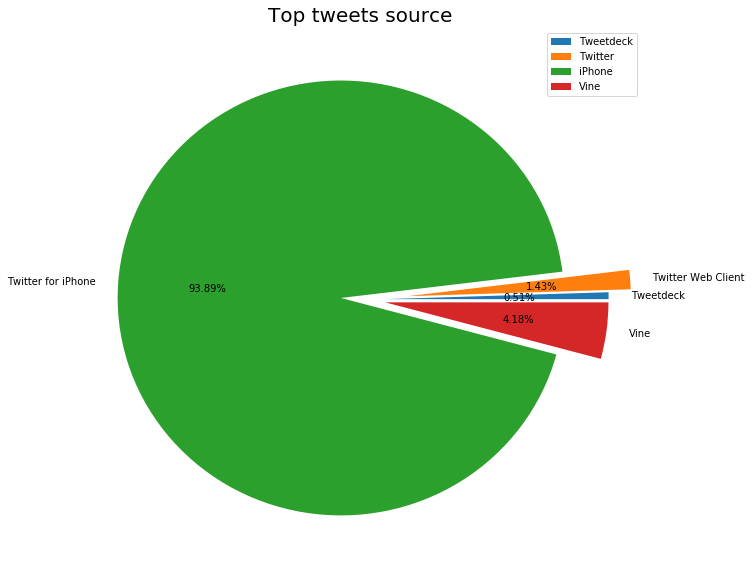

In [79]:
tweet_source = twitter_archive_clean.groupby('source').count()[['tweet_id']]
tweet_source.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_source['source_percentage'] = tweet_source.source_count / tweet_source.source_count.sum() * 100
tweet_source['source_percentage'].plot.pie(figsize=(10,10), autopct='%1.2f%%', explode=[0.1,0.2,0.1,0.1])
plt.title("Top tweets source ", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "iPhone", "Vine"])
plt.ylabel("");

In [80]:
all_data_clean['name'].value_counts()\
         .head(10)

Oliver     10
Charlie    10
Cooper     10
Lucy        9
Tucker      8
Sadie       8
Penny       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64

In [81]:
name_count= all_data_clean.groupby('name', as_index= False)['tweet_id']\
.count().sort_values('tweet_id', ascending= False).head(10)

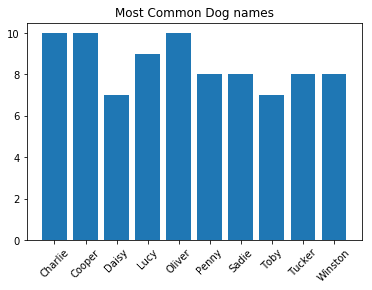

In [82]:
plt.bar('name', 'tweet_id', data= name_count)
plt.xticks(rotation= 45)
plt.title('Most Common Dog names')
plt.show()

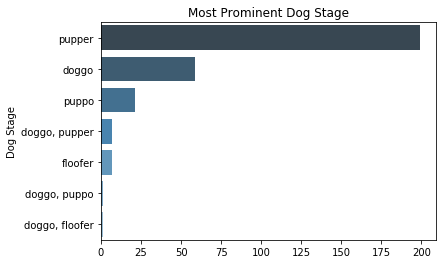

In [83]:
# Create a visualization

x=all_data_clean.dog_stage.value_counts().index
y=all_data_clean.dog_stage.value_counts().values

sns.barplot(x=y,y=x,palette="Blues_d")
plt.ylabel('Dog Stage')
plt.title('Most Prominent Dog Stage')
plt.savefig('test.png',dpi=300, transparemt=True)